# Обучение с применением учителя (supervised learning)
### Основные определения

$X$ &ndash; множество объектов <br/>
$Y$ &ndash; множество ответов <br/>
$y^*: X \rightarrow Y$ &ndash; целевая функция <br/>

Пусть для набора объектов $X$ задан набор отображений $f_1, \dots, f_n: X \rightarrow D_{f_i}$ . Будем называть их признаками, значения $f_i$ - результат измерения некоторой характеристики объекта $x  \in X$ .
* если $D_{f_i}$ - конечное множество, то $f_i$ - *номинальный* признак
* если $D_{f_i} = \{0, 1\}$ , то $f_i$ - *бинарный* признак 
* если $D_{f_i} = \mathbb R$ , то $f_i$ - *количественный* признак

Таким образом, кажому объекту $x \in X$ можно сопоставить $(f_1, \dots, f_n)$ который называется признаковым описанием объекта $x$.

### Постановка задачи

Значения целевой функции известны на конечном множестве объектов: <br/> $\{x_1, \dots, x_l\} \subset X$

$T^l = \{(x_i, y_i)\}^l_{i=1}$ &ndash; обучающая выборка

По выборке $T^l$ нужно восстановить зависимость $y^*$, то есть построить функцию <br/> $a: X \rightarrow Y$,<br/>
которая достаточно хорошо приближала бы функцию $y^*$ на всём множестве $X$.

### Типы задач

##### В зависимости от множества $Y$ задачу можно разделить на следующие типы:
Задача классификации
>$Y=\{1,\dots,M\}$

Восстановления регрессии
> $Y=\mathbb R$ 

##### В зависимости от известных данных и области применения:

Transductive learning 
> если все объекты $X$ известны во время обучения.

Semi-supervised learning 
> если во время обучения помимо $T^l$ дано ещё большое количество объекто $S^u = \{x_{l+1}, \dots, x_{l+u}\} \subset X$ для которых неизвестно значение функции $y^*$. Обычно $l \ll u$.

### Функционал качества

Пусть $a$ функция ("алгоритм"), которую мы нашли в процессе решения задачи. Пусть функция задана функция $\mathbb L(a,x_i)$, характеризующая величину ошибки функции $a$ на объекте $x_i$: $a(x_i)$. Если ответ алгоритма в точке $x_i$ корректен, тогда $\mathbb L(a,x_i)=0$

Определим *функционал качества* на тренировочном множестве $X$ как среднее значение функции потерь на элементах этого множества:<br/> 
$Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}\mathbb L(a,x_i)$

Примеры функций потерь:
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}[a(x) \neq y^*(x)]$ &mdash; индикатор ошибки
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}|a(x) - y^*(x)|$ &mdash; средняя ошибка
* $Q(a, X^l)=\frac{1}{l}\sum^l_{i=1}(a(x) - y^*(x))^2$ &mdash; серднеквадратичная ошибка

### Модель алгоритмов обучения

Если мы ищем алгоритм $a(x)$ из некоторого параметрического семейства $A = \{a(x, \theta) | \theta \in \Theta\}$, $a(x) \in A$, то $A$ называется моделью алгоритмов, а $\Theta$ называется пространством параметров. 

Соотве нам нужно минимизировать функционал качества по $\theta$: <br/>

$$a(x) = \arg \min_{\theta \in \Theta}  Q(a(x, \theta), X^l)$$

# Примеры

In [1]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv('data/real_estate.csv')
df = pd.read_csv('http://pastebin.com/raw.php?i=RcHeuYJ4')
df

,Unnamed: 0,Комнат,Район города,Адрес,Этаж,Общ,Жил,Кух,М,Тел,Примечания,#Цена
0,1,1,Московский,Пулковское ш.,0/0,35.7,0.0,0.0,NaN,NaN,NaN,3820.0
1,2,1,Московский,Пулковское ш.,0/0,27.5,0.0,0.0,NaN,NaN,NaN,3080.0
2,3,1,Московский,Московское ш.,0/0,35.5,0.0,0.0,NaN,NaN,NaN,3470.0
3,4,1,Московский,Московское ш.,0/0,33.5,0.0,0.0,NaN,NaN,NaN,2989.0
4,5,1,Московский,Московское ш.,0/0,24.2,0.0,0.0,NaN,NaN,NaN,2261.0
5,6,1,Московский,Московский пр. / Смоленская ул.,0/0,37.9,0.0,0.0,NaN,NaN,NaN,3983.0
6,7,1,Московский,Дунайский пр. 7,0/0,28.0,0.0,0.0,NaN,NaN,NaN,2800.0
7,8,1,Московский,Дунайский пр. 7,0/0,41.4,0.0,0.0,NaN,NaN,NaN,3580.0
8,10,1,Московский,Московский пр. / Смоленская ул.,0/0,27.5,0.0,0.0,NaN,NaN,NaN,3030.0
9,11,1,Московский,Ленсовета ул. 34 / 3,0/0,44.3,0.0,0.0,NaN,NaN,NaN,5316.0


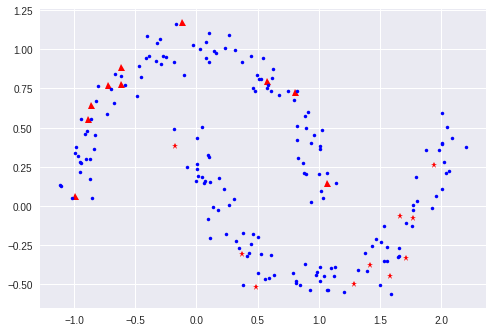

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

xy, c = ds.make_moons(200, False, 0.09)

ind0 = np.arange(0, 100)
ind1 = np.arange(100, 200)
np.random.shuffle(ind0)
np.random.shuffle(ind1)

plt.plot(xy[ind0[:10], 0], xy[ind0[:10], 1], 'r^')

plt.plot(xy[ind1[:10], 0], xy[ind1[:10], 1], 'r*')

plt.plot(xy[ind0[10:], 0], xy[ind0[10:], 1], 'b.')
plt.plot(xy[ind1[10:], 0], xy[ind1[10:], 1], 'b.')
plt.show()

In [4]:
data = ds.load_iris()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['Class'] = data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
data = ds.fetch_california_housing()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['Value'] = data['target']
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


# Линейная регрессия

Будем искать алгоритм $a(x)$ в виде: $$a(x, \theta_0, \dots, \theta_n)=\theta_0 + \theta_1  f_1(x) + \dots + \theta_n  f_n(x)$$ <br/>
Для простоты определим функцию $f_0(x)\equiv 1$, и будем отождествлять объект $x \in X$ с вектором $x \longrightarrow (f_0(x), \dots, f_n(x)) = (x_0, \dots, x_n)$

Такми образом наш алгоритм будет иметь вид: $a(x)=\hat{y}=x^T\theta$ .
Пусть дано тренировочное множество $X=\{x_1, \dots, x_l\}$, представим его в виде матрицы:
$$X=\begin{pmatrix} x_{1,0} & \dots & x_{1, n} \\ \vdots & \vdots & \vdots \\ x_{l,0} & \dots & x_{l, n}  \end{pmatrix}$$  
$$Y^* = \begin{pmatrix} y^*_{1}\\ \vdots \\ y^*_{l}   \end{pmatrix}$$ 
$$Q(\theta)= \frac{1}{l} \sum_{i=1}^{l}(y^*_i-x_i^T\theta)^2= \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta)$$

Продифференцируем по компонентам $\theta$, получим условие: 
$$X^T(Y^*-X\theta)=0$$ 
Затем:
$$X^T Y^*- X^T X \theta = 0$$ 
$$\theta = (X^T X)^{-1} X^T Y^* $$

### Пример 

cгенерируем 300 объектов размерности 1

In [6]:
l, n = 300, 1

np.random.seed(5)
X = np.random.uniform(low=0.0, high=30.0, size=(l, n))
X[:10]

array([[  6.65979513],
       [ 26.12196919],
       [  6.20157466],
       [ 27.55832724],
       [ 14.65233566],
       [ 18.35231589],
       [ 22.97723569],
       [ 15.55253964],
       [  8.90401505],
       [  5.63163686]])

Добавим к ним "искуственные" единицы, отвечающие за свободныу компоненту

In [7]:
X = np.hstack((np.ones(shape=(l, 1)), X))

In [8]:
X[:10]

array([[  1.        ,   6.65979513],
       [  1.        ,  26.12196919],
       [  1.        ,   6.20157466],
       [  1.        ,  27.55832724],
       [  1.        ,  14.65233566],
       [  1.        ,  18.35231589],
       [  1.        ,  22.97723569],
       [  1.        ,  15.55253964],
       [  1.        ,   8.90401505],
       [  1.        ,   5.63163686]])

Будет считать, что существует зависимость функцией $y = 15.4 + 7.2  x$. Сгенерируем "ответы" с добавлением нормально-распреленного шума.

In [9]:
Y = 15.4 * X[:,0] + 7.2 * X[:,1] + np.random.normal(0., 10., size=l)
Y = Y.reshape((-1, 1))
Y[:10]

array([[  63.17699227],
       [ 202.20159591],
       [  41.97217131],
       [ 223.75964588],
       [ 105.98552819],
       [ 134.71559959],
       [ 177.0790229 ],
       [ 127.72472414],
       [  79.95968992],
       [  48.31031646]])

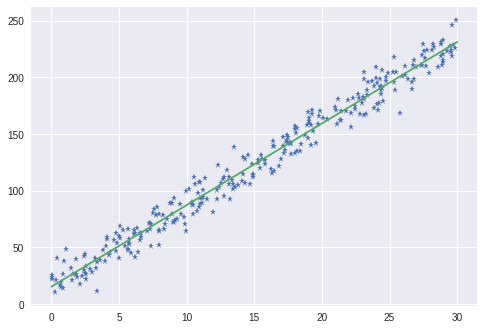

In [10]:
plt.plot(X[:,1], Y, '*')

dx = np.linspace(0, 30, 50)
dy = 15.4 + 7.2 * dx 
plt.plot(dx, dy)

plt.show()

Теперь восстановим наши коэффиценты

In [11]:
"""
theta = np.dot(np.linalg.pinv(np.dot(X.T, X)), 
               np.dot(X.T, Y)) 
"""


theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [12]:
theta

array([[ 15.4246964 ],
       [  7.20311498]])

### Решение с помощью нахождения минимума функционала качества

$$X=\begin{pmatrix} x_{1,0} & \dots & x_{1, n} \\ \vdots & \vdots & \vdots \\ x_{l,0} & \dots & x_{l, n}  \end{pmatrix}$$  
$$Y^* = \begin{pmatrix} y_{1}^*\\ \vdots \\ y_{l}^*   \end{pmatrix}$$ 
$$Q(\theta)= \frac{1}{l} \sum_{i=1}^{l}(y_i^*-x_i^T\theta)^2= \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta)$$

$$\frac{\partial Q}{\partial \theta_j} = \frac{2}{l} \sum_{i=1}^{l}(x_i^T\theta-y^*_i) x_{i,j} $$
$$grad(Q) = \frac{2}{l} (X \theta-Y^*)^TX $$

### Пример

In [13]:
import scipy as sp

def func_to_min(theta):
    theta = theta.reshape((-1, 1))
    return np.sum((X @ theta - Y) ** 2)    


def func_grad(theta):
    theta = theta.reshape((-1, 1))
    return (X @ theta - Y).T @ X
   

sp.optimize.fmin_tnc(func_to_min, np.array([1., 1.]), func_grad) 
sp.optimize.fmin_l_bfgs_b(func_to_min, np.array([1., 1.]), func_grad, approx_grad=False)
#help(sp.optimize.fmin_l_bfgs_b)

(array([ 15.4246964 ,   7.20311498]),
 28792.667205205376,
 {'funcalls': 11,
  'grad': array([[  3.01476533e-09,   6.27738928e-09]]),
  'nit': 6,
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})

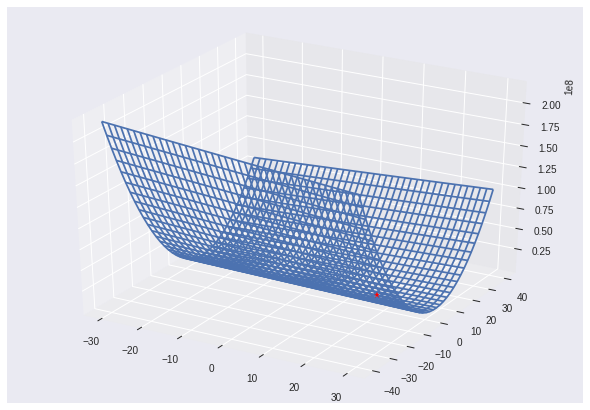

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

dx = np.linspace(-30, 30, 40)
dy = np.linspace(-40, 40, 40)
dX, dY = np.meshgrid(dx, dy)

dZ = np.array([func_to_min(np.array([x, y])) for x, y in zip(dX.ravel(), dY.ravel())])
dZ = dZ.reshape((-1, 40))
ax.plot3D([15.4], [7.2], func_to_min(np.array([15.4, 7.2])), 'r*')
ax.plot_wireframe(dX, dY, dZ)


### Theano

Библиотека, с помощью которой можно описывать вычислительный процесс символьно, символьно же можно считать градиент

In [15]:
from theano import tensor
from theano import function
from theano import grad
from theano import pp

t_X = tensor.matrix('training set')
t_Theta = tensor.matrix('theta')
t_Y = tensor.matrix('y*')

t_O = tensor.dot(t_X, t_Theta)

err = ((t_Y - t_O) ** 2).sum()
grad_err = grad(err, t_Theta)

In [16]:
func_err = function([t_Theta, t_X, t_Y], err)
func_grad_err = function([t_Theta, t_X, t_Y], grad_err)

In [17]:
func_err(np.array([0.0,  1.0]).reshape((-1, 1)), X, Y)

array(4419996.366744348)

In [18]:
Y_column = Y.reshape((-1, 1))
 
%time    
sp.optimize.fmin_tnc(lambda theta: func_err(theta.reshape((-1, 1)), X, Y_column), 
                     np.array([1., 1.]), 
                     lambda theta: func_grad_err(theta.reshape((-1, 1)), X, Y_column))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


(array([ 15.42469604,   7.20311498]), 11, 1)

# Регуляризация

Если матрицы $XX^T$ вырождена, то столбцы матрицы $X$ линейно зависимы. Это фактически означает, что некоторые признаки линейно зависимы друг от друга и их нужно отбросить. Чаще возникакет проблема *мультиколлинеарности*, когда $XX^T$ близка к некоторой матрице неполного ранга, что влечет за собой неустойчивость решения и переобучение. 

Для решения этой проблемы можно добавить к функционалу $Q$ регуляризатор, штрафующий за большие абсолютные значения компонентов вектора $\theta$
$$Q(\theta) = \frac{1}{l}(Y^*-X\theta)^T(Y^*-X\theta) + \alpha \theta^T \theta$$

Параметр $\alpha$ определяет "значимость штрафоного слагаемого".  В таком виде мы можем найти решение аналитически:

Продифференцируем по компонентам $\theta$, получим условие: 
$$X^T(Y^*-X\theta) + \alpha\theta=0$$ 
Затем:
$$X^T Y^*- X^T X \theta + \alpha\theta= 0$$ 
$$\theta = (X^T X + \alpha I_n)^{-1} X^T Y^* $$

In [19]:
import ipywidgets

%matplotlib inline

l, n = 6, 1

np.random.seed(25)
X = np.random.uniform(low=0.0, high=5.0, size=(l, n))
X = np.hstack((np.ones((l, 1)),                 
               X, 
               X**2,
               X**3,
               X**4,
               X**5
              ))
            
Y = 15.4 + 7.2 * X[:,1] + np.random.normal(0., 50., size=l)


def solve(alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(6)) @ X.T @ Y
    plt.plot(X[:,1], Y, '*')

    dx = np.linspace(-2, 6, 300)
    dy = theta[0] 
    for i in range(1, 6):
        dy += theta[i] * (dx ** i)
     
    plt.plot(dx, 15.4 + 7.2 * dx)
    plt.plot(dx, dy)    
    
    plt.xlim((-2, 6))
    plt.ylim((-100, 100))
    
    plt.show()
    
ipywidgets.interactive(solve, alpha=ipywidgets.FloatSlider(min=0., max=30., step=0.1, value=0.1))